### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Car_Insurance_Claim.csv")
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


### Data preprocessing

In [3]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [5]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [6]:
df.shape

(10000, 19)

In [7]:
df.nunique()

ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9018
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [10]:
df.VEHICLE_TYPE.unique()

array(['sedan', 'sports car'], dtype=object)

In [11]:
df[['OUTCOME']].astype('int64')

,OUTCOME
0,0
1,1
2,0
3,0
4,1
...,...
9995,0
9996,0
9997,0
9998,1


In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

### EDA - Exploratory Data Analysis

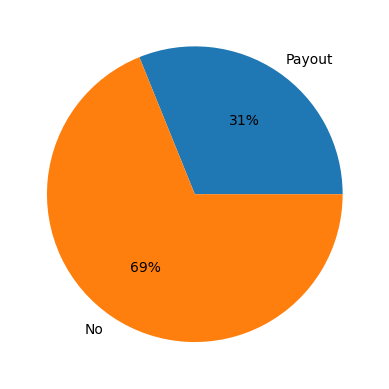

In [14]:
labels = ['Payout','No']
a = df[df.OUTCOME == 1].shape[0]
b = df[df.OUTCOME == 0].shape[0]
data = [a,b]
plt.pie(data, labels=labels, autopct = '%0.0f%%')
plt.show()

In [15]:
df['AGE'].value_counts()

26-39    2475
40-64    2412
65+      1641
16-25    1621
Name: AGE, dtype: int64

<Axes: title={'center': 'Age Count'}, xlabel='AGE', ylabel='count'>

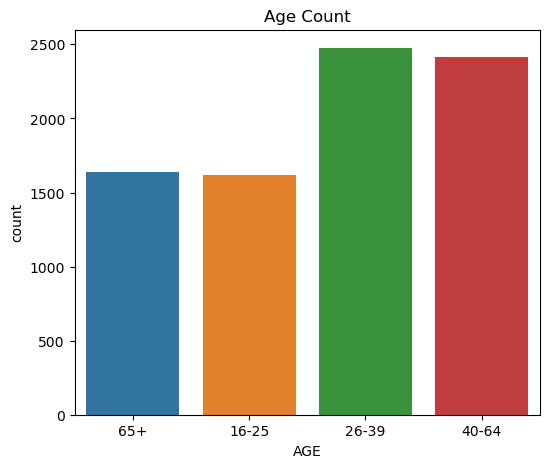

In [16]:
plt.figure(figsize=(6,5))
plt.title('Age Count')
sns.countplot(data=df, x ='AGE')

<Axes: title={'center': 'Age Count colored by outcome'}, xlabel='AGE', ylabel='count'>

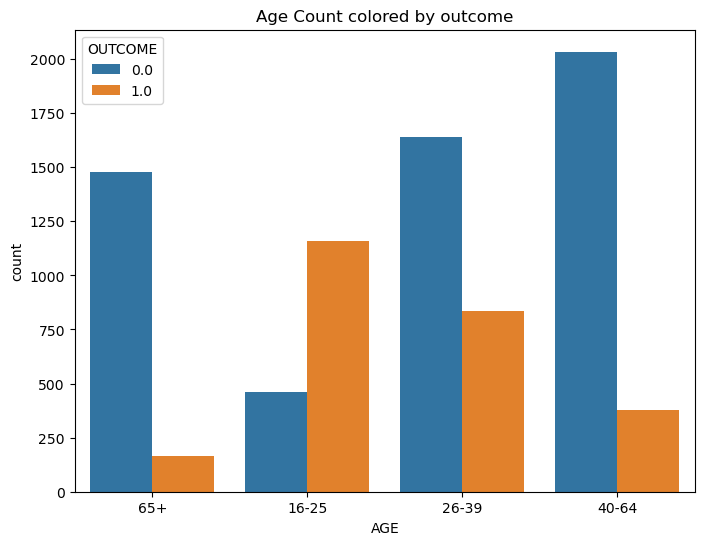

In [17]:
plt.figure(figsize=(8,6))
plt.title('Age Count colored by outcome')
sns.countplot(data=df, x ='AGE', hue='OUTCOME')

<Axes: title={'center': 'Race Count color by outcome'}, xlabel='RACE', ylabel='count'>

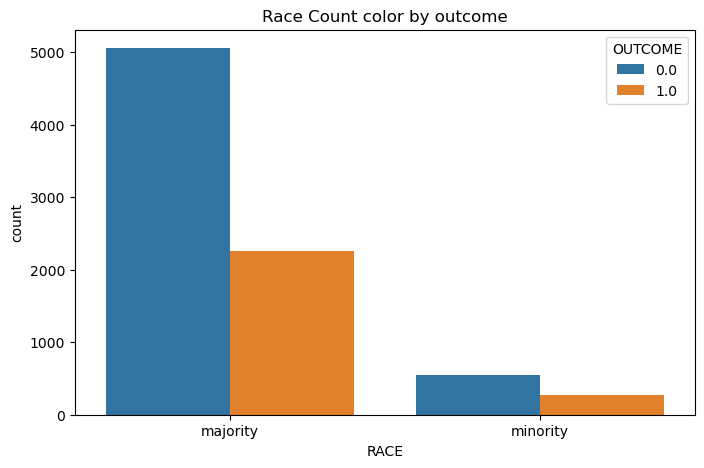

In [18]:
plt.figure(figsize=(8,5))
plt.title('Race Count color by outcome')
sns.countplot(data=df, x ='RACE', hue='OUTCOME')

<Axes: title={'center': 'Driving Experience Count color by outcome'}, xlabel='DRIVING_EXPERIENCE', ylabel='count'>

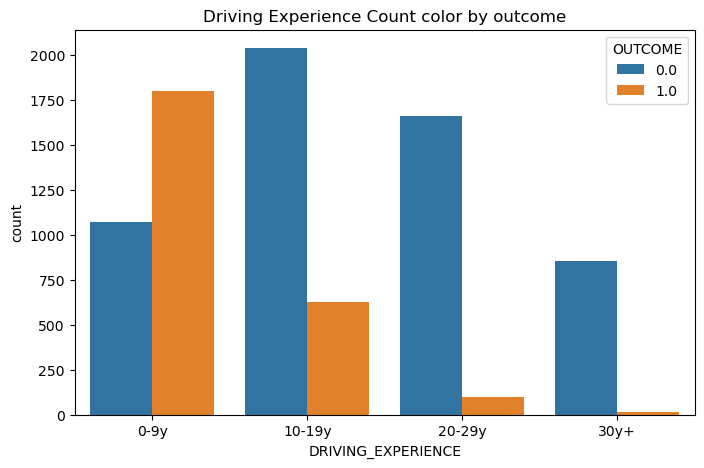

In [19]:
plt.figure(figsize=(8,5))
plt.title('Driving Experience Count color by outcome')
sns.countplot(data=df, x ='DRIVING_EXPERIENCE', hue='OUTCOME')

<Axes: title={'center': 'Income Count color by outcome'}, xlabel='INCOME', ylabel='count'>

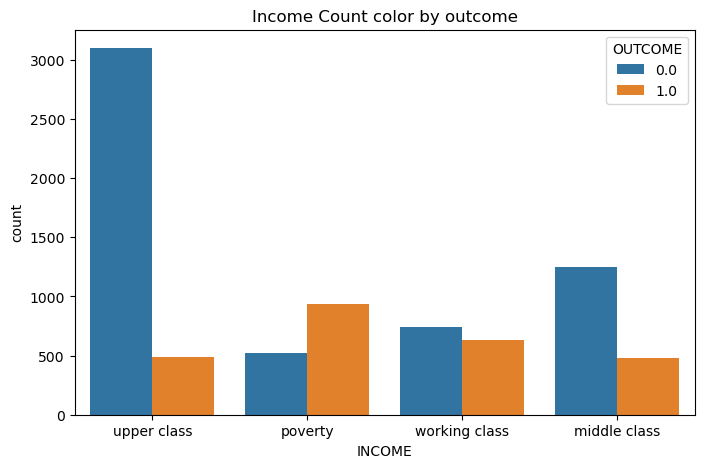

In [20]:
plt.figure(figsize=(8,5))
plt.title('Income Count color by outcome')
sns.countplot(data=df, x ='INCOME', hue='OUTCOME')

<Axes: title={'center': 'married Count colored by outcome'}, xlabel='MARRIED', ylabel='count'>

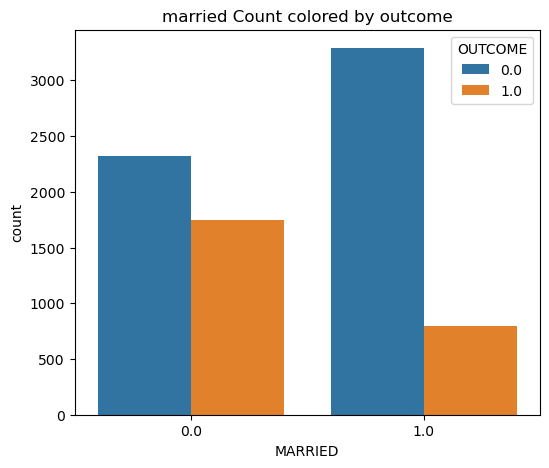

In [21]:
plt.figure(figsize=(6,5))
plt.title('married Count colored by outcome')
sns.countplot(data=df, x='MARRIED', hue='OUTCOME')

In [22]:
df.EDUCATION.unique()

array(['high school', 'none', 'university'], dtype=object)

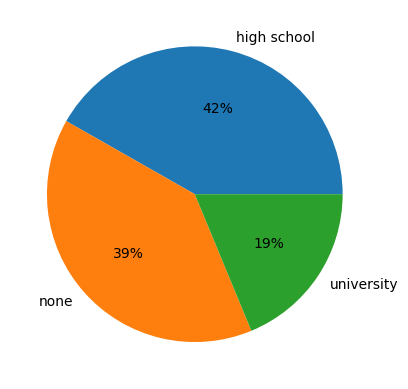

In [23]:
plt.pie(df['EDUCATION'].value_counts(),autopct='%0.0f%%',labels=['high school','none','university'])
plt.show()

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

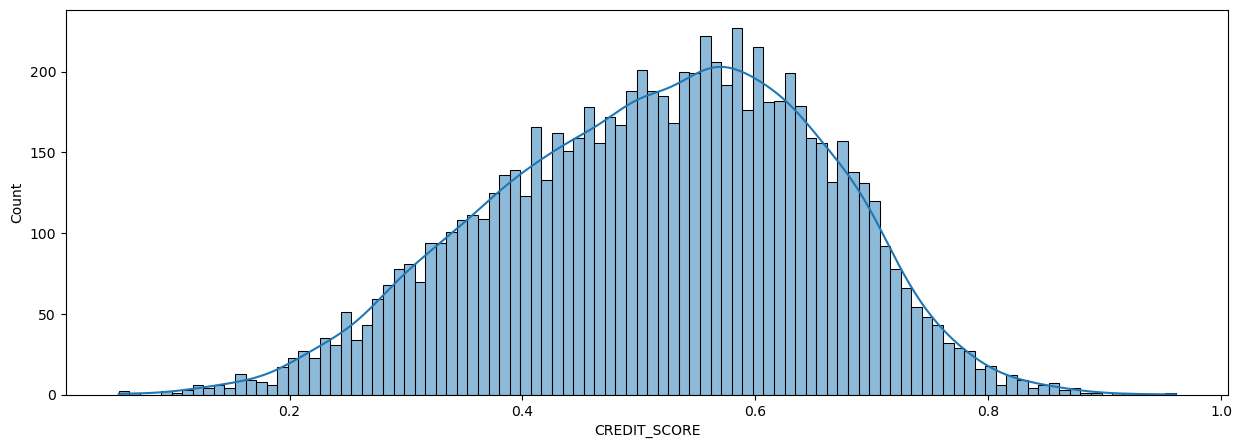

In [24]:
plt.figure(figsize = (15,5))
sns.histplot(data=df['CREDIT_SCORE'],bins=100, kde=True)

<Axes: title={'center': 'Annual Mileage Score histogram'}, xlabel='ANNUAL_MILEAGE', ylabel='Count'>

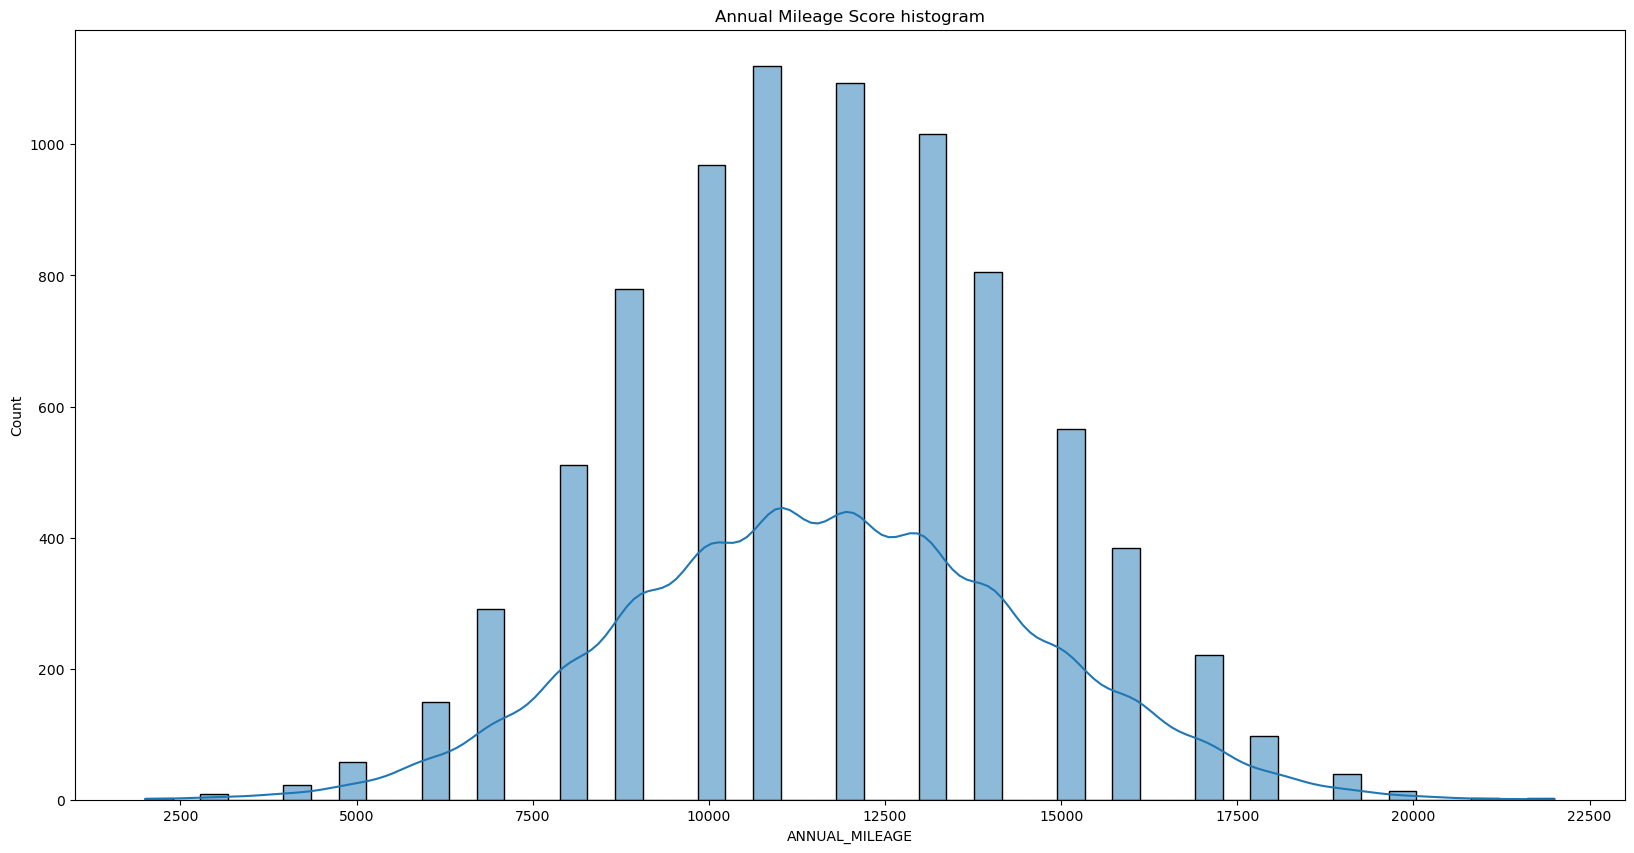

In [25]:
plt.figure(figsize=(20,10))
plt.title('Annual Mileage Score histogram')
sns.histplot(data=df, x='ANNUAL_MILEAGE', kde=True)

<Axes: title={'center': 'Annual Mileage Score histogram'}, xlabel='ANNUAL_MILEAGE', ylabel='Count'>

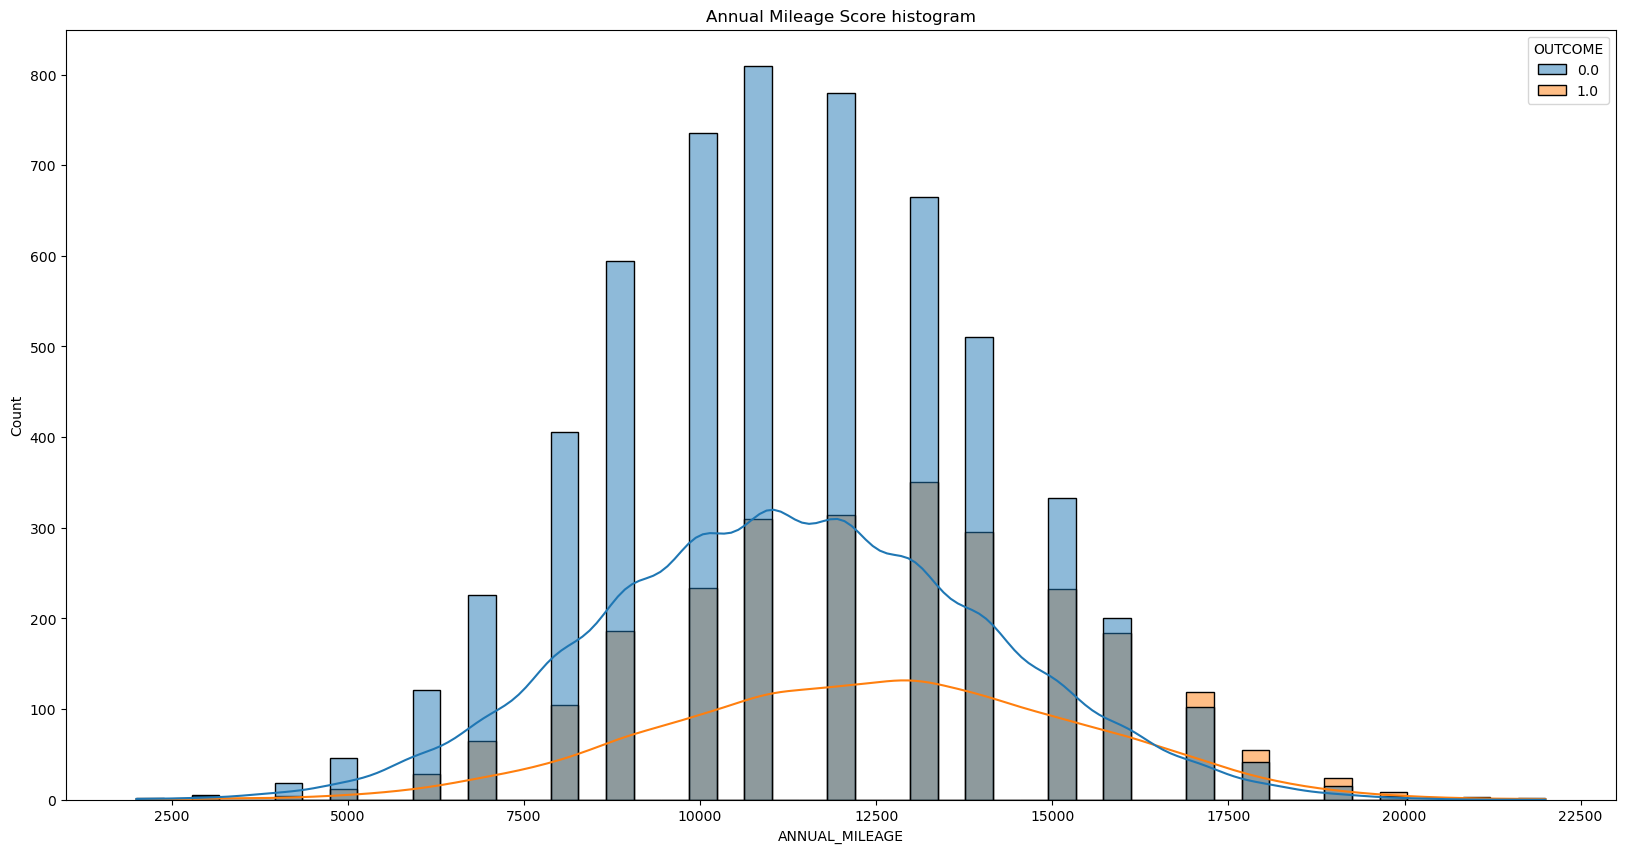

In [26]:
plt.figure(figsize=(20,10))
plt.title('Annual Mileage Score histogram')
sns.histplot(data=df, x='ANNUAL_MILEAGE',hue='OUTCOME', kde=True)

<Axes: title={'center': 'DUIS count colored by outcome'}, xlabel='DUIS', ylabel='count'>

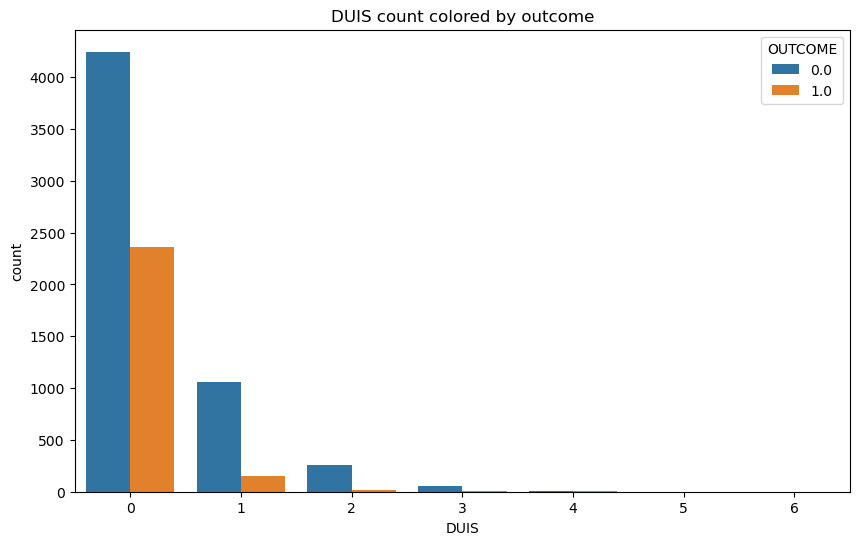

In [27]:
plt.figure(figsize=(10,6))
plt.title('DUIS count colored by outcome')
sns.countplot(data=df, x='DUIS',hue='OUTCOME')

<Axes: title={'center': 'Past Accidents colored by outcome'}, xlabel='PAST_ACCIDENTS', ylabel='count'>

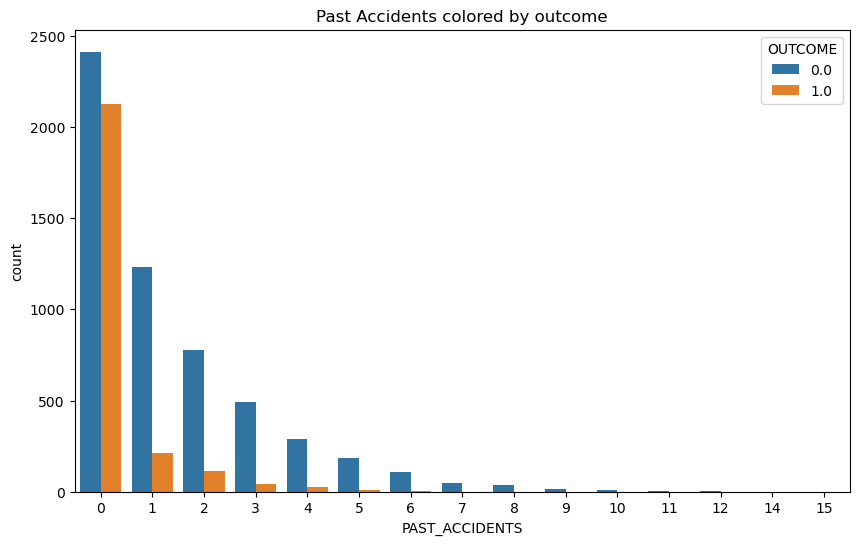

In [28]:
plt.figure(figsize=(10,6))
plt.title('Past Accidents colored by outcome')
sns.countplot(data=df, x='PAST_ACCIDENTS',hue='OUTCOME')

### Encoding

#### Converting Categorical data into numeric data

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df = df.apply(LabelEncoder().fit_transform)

In [31]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,4616,3,0,0,0,0,2,6316,1,0,0,1,0,10,0,0,0,0,0
1,6071,0,1,0,0,1,1,1162,0,1,0,0,0,14,0,0,0,0,1
2,1639,0,0,0,0,0,3,3383,1,1,0,0,0,9,0,0,0,0,0
3,3873,0,1,0,0,2,3,98,1,1,0,1,2,9,0,0,0,0,0
4,5899,1,1,0,1,1,3,1574,1,1,0,0,2,10,0,2,0,1,1


In [32]:
df.corr()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.008848,-0.000597,0.001657,0.006306,-0.011313,-0.006795,-0.003774,0.004385,0.003224,0.009347,-0.000409,0.000572,0.002247,0.010431,0.012938,0.006164,0.006077,-0.006145
AGE,0.008848,1.000000,0.009158,-0.013030,0.706699,0.153919,0.144284,0.499364,0.266822,-0.231645,0.380782,0.387673,0.007477,-0.275722,-0.006707,0.458364,0.283183,0.429931,-0.444137
GENDER,-0.000597,0.009158,1.000000,-0.006536,0.010805,0.089414,0.008774,-0.074013,0.018540,-0.016178,0.015835,0.005859,0.000633,-0.021560,0.001674,0.207306,0.104925,0.228317,0.098576
RACE,0.001657,-0.013030,-0.006536,1.000000,-0.027612,-0.041985,0.001466,-0.037937,-0.035076,0.019483,-0.021031,0.000570,0.003007,-0.003573,0.007010,-0.014485,-0.015226,-0.007803,0.013125
DRIVING_EXPERIENCE,0.006306,0.706699,0.010805,-0.027612,1.000000,0.093556,0.080491,0.346982,0.201855,-0.163937,0.263730,0.276970,0.004742,-0.180538,-0.006269,0.638545,0.399704,0.603690,-0.496543
EDUCATION,-0.011313,0.153919,0.089414,-0.041985,0.093556,1.000000,0.084658,0.220180,0.122869,-0.110221,0.105869,0.076480,0.015750,-0.082339,0.008892,0.077295,0.062555,0.072382,-0.094363
INCOME,-0.006795,0.144284,0.008774,0.001466,0.080491,0.084658,1.000000,0.088804,0.046096,-0.069541,0.061802,0.047748,0.017138,-0.051934,-0.010075,0.055685,0.048231,0.045793,-0.043043
CREDIT_SCORE,-0.003774,0.499364,-0.074013,-0.037937,0.346982,0.220180,0.088804,1.000000,0.315515,-0.270153,0.283435,0.224311,0.004504,-0.177551,-0.007390,0.210718,0.127260,0.183384,-0.323876
VEHICLE_OWNERSHIP,0.004385,0.266822,0.018540,-0.035076,0.201855,0.122869,0.046096,0.315515,1.000000,-0.152509,0.170752,0.116477,-0.007617,-0.093710,0.012189,0.133357,0.087432,0.121924,-0.386217
VEHICLE_YEAR,0.003224,-0.231645,-0.016178,0.019483,-0.163937,-0.110221,-0.069541,-0.270153,-0.152509,1.000000,-0.128099,-0.103969,-0.011865,0.079942,0.025430,-0.109593,-0.053620,-0.097389,0.290129


<Axes: title={'center': 'Correlationship of factors'}>

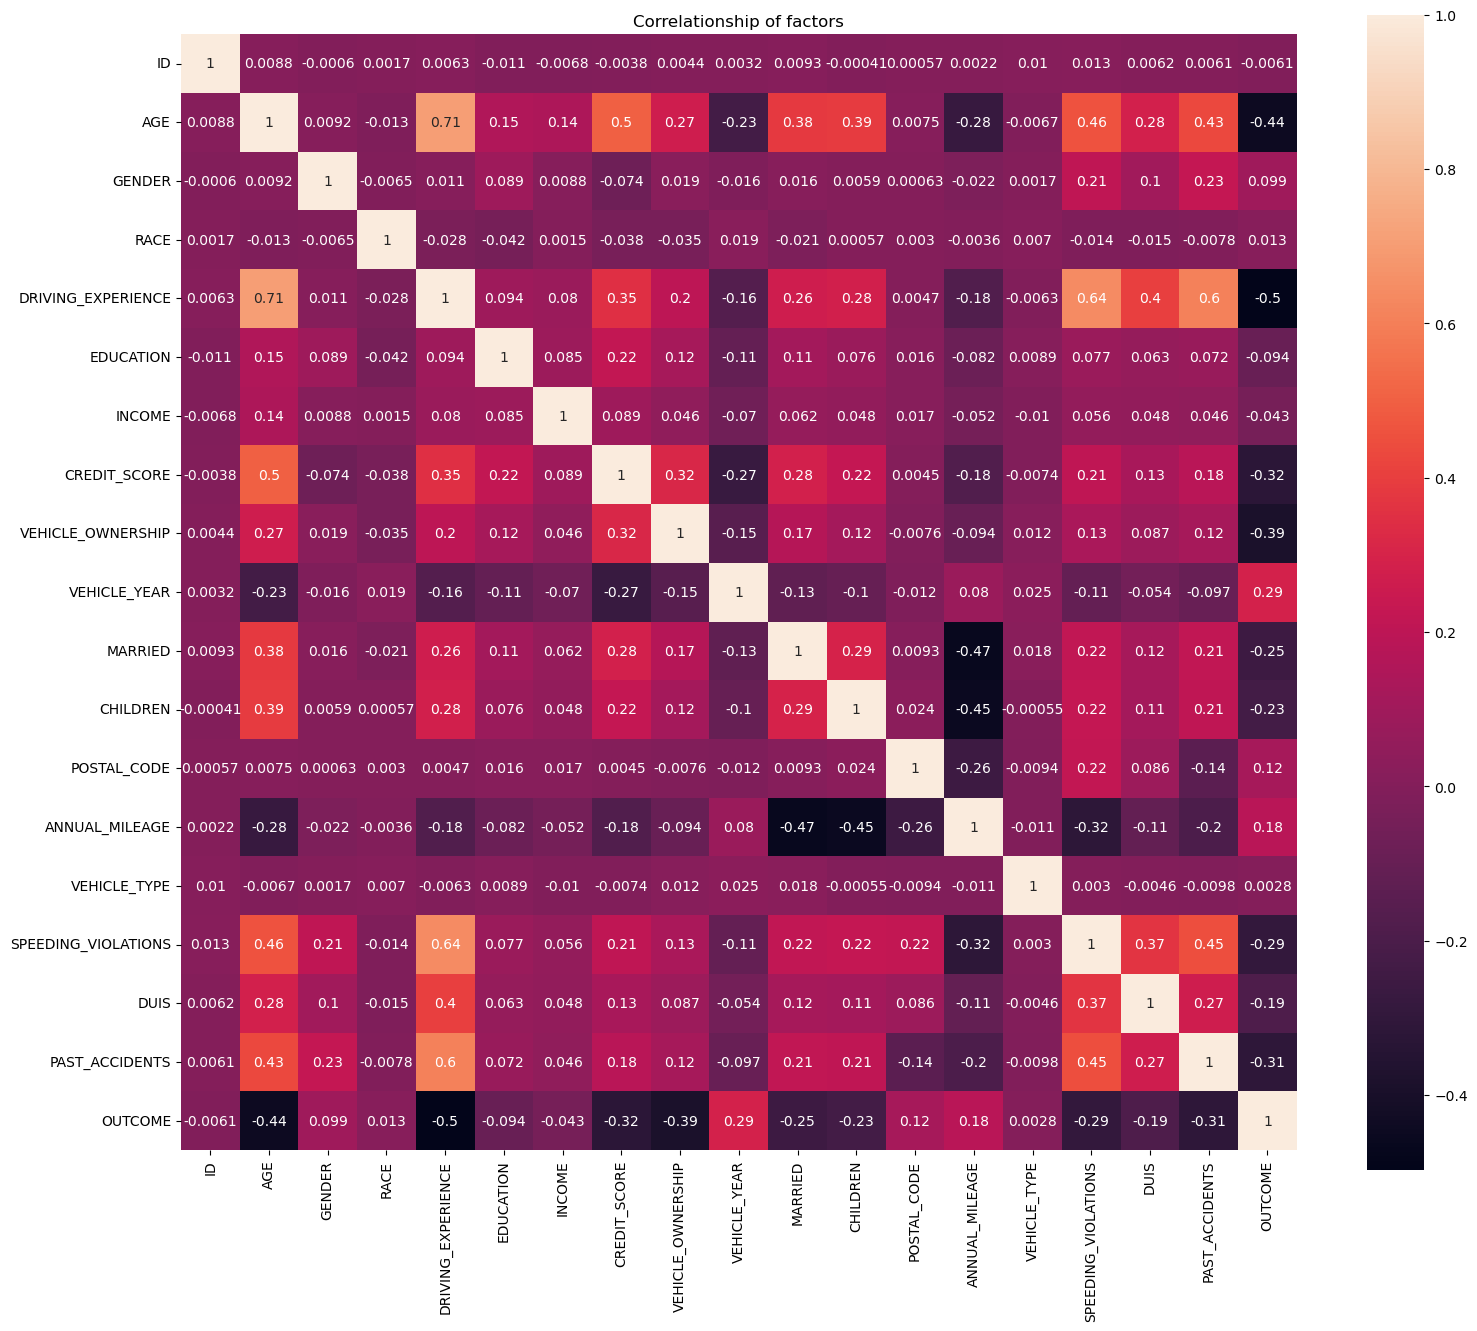

In [33]:
fig, ax = plt.subplots()
plt.title('Correlationship of factors')
fig.set_size_inches((18,15))
sns.heatmap(df.corr(), square = True, annot = True)

### Model Creation

In [34]:
x = df.drop(['OUTCOME'], axis=1)
y = df['OUTCOME']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score,confusion_matrix

In [39]:
classifier = SVC(kernel='linear', gamma='auto', C=2)

In [40]:
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1688
           1       0.77      0.71      0.74       757

    accuracy                           0.84      2445
   macro avg       0.82      0.81      0.81      2445
weighted avg       0.84      0.84      0.84      2445



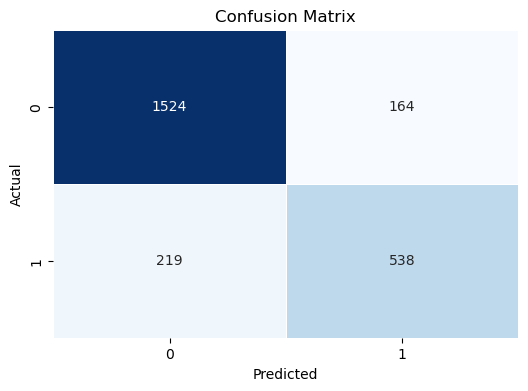

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()